📌 Threshold (Ngưỡng hóa) là gì?

    Thresholding (Ngưỡng hóa) là một kỹ thuật xử lý ảnh dùng để chuyển ảnh từ ảnh màu hoặc ảnh xám thành ảnh nhị phân (chỉ có hai giá trị: đen và trắng).

🔍 Cơ chế hoạt động:

    Với mỗi pixel trong ảnh, ta so sánh giá trị độ sáng của nó với một ngưỡng (threshold) được chọn trước.

    Nếu giá trị pixel lớn hơn hoặc bằng ngưỡng → Chuyển pixel thành màu trắng (giá trị cao, ví dụ: 255).

    Nếu giá trị pixel nhỏ hơn ngưỡng → Chuyển pixel thành màu đen (giá trị thấp, ví dụ: 0).

🔢 Các phương pháp Thresholding trong OpenCV:

1. Simple Thresholding (Ngưỡng hóa đơn giản)

Sử dụng một giá trị ngưỡng cố định để phân tách.

    cv2.THRESH_BINARY: Pixel >= threshold → 255, Pixel < threshold → 0.

    cv2.THRESH_BINARY_INV: Ngược lại, Pixel >= threshold → 0, Pixel < threshold → 255.

    cv2.THRESH_TRUNC: Pixel >= threshold → threshold, Pixel < threshold → giữ nguyên.

    cv2.THRESH_TOZERO: Pixel >= threshold → giữ nguyên, Pixel < threshold → 0.

    cv2.THRESH_TOZERO_INV: Pixel >= threshold → 0, Pixel < threshold → giữ nguyên.

2. Adaptive Thresholding (Ngưỡng hóa thích ứng)

Thay vì sử dụng một ngưỡng cố định, ngưỡng này sẽ thay đổi theo từng vùng nhỏ của ảnh. Rất hữu ích khi ảnh có độ sáng không đồng đều.

    cv2.ADAPTIVE_THRESH_MEAN_C: Tính toán ngưỡng dựa trên trung bình của vùng lân cận.

    cv2.ADAPTIVE_THRESH_GAUSSIAN_C: Tính toán ngưỡng dựa trên trọng số Gaussian của vùng lân cận.

3. Otsu’s Binarization (Ngưỡng hóa Otsu)

Tự động tìm giá trị ngưỡng tối ưu để phân tách ảnh thành hai phần khác biệt nhất.

Text(0.5, 1.0, 'Binary')

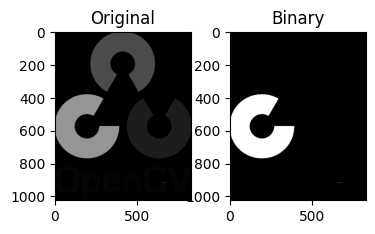

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('../opencv_logo.png',0)
ret,img1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

#127: Ngưỡng (threshold) - Nếu pixel ≥ 127, chuyển thành 255 (trắng), nếu nhỏ hơn 127 thì thành 0 (đen).

# 255: Giá trị tối đa mà pixel sẽ nhận được nếu vượt qua ngưỡng (trắng).

plt.subplot(2,3,1),plt.imshow(img,'gray',vmin=0,vmax=255)
plt.title('Original')
plt.subplot(2,3,2),plt.imshow(img1,'gray',vmin=0,vmax=255)
plt.title('Binary')

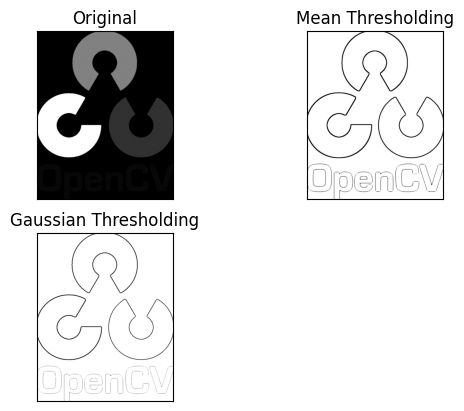

In [ ]:
img = cv.imread('../opencv_logo.png',0)

img = cv.medianBlur(img,5)

# Làm mờ trung vị (Median Blur): Lọc trung vị được áp dụng lên ảnh để giảm nhiễu.
# Tham số 5: Kích thước của kernel (5x5), là số lẻ.
# Hoạt động: Mỗi pixel được thay thế bằng giá trị trung vị của các pixel xung quanh trong cửa sổ 5x5.
# Mục đích: Loại bỏ nhiễu muối tiêu (salt-and-pepper noise) và làm ảnh mượt hơn, giúp thresholding chính xác hơn.

th1 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)

# Adaptive Thresholding: Kỹ thuật ngưỡng hóa mà ngưỡng được tính toán dựa trên các vùng nhỏ của ảnh thay vì toàn bộ ảnh.

# Tham số:

   # img: Ảnh gốc (sau khi làm mờ).
   # 255: Giá trị tối đa (trắng) mà pixel sẽ nhận nếu vượt qua ngưỡng.
   # cv.ADAPTIVE_THRESH_MEAN_C: Phương pháp tính toán ngưỡng, ở đây là Mean (Trung bình) của vùng lân cận.
   # cv.THRESH_BINARY: Kiểu thresholding nhị phân (0 hoặc 255).
   # 11: Kích thước của khối (blockSize) được sử dụng để tính ngưỡng (ví dụ: 11x11).
   # 2: Hằng số C được trừ đi từ giá trị trung bình của khối (11x11) để làm ngưỡng thấp hơn.

# Kết quả: Ảnh nhị phân (th1), với ngưỡng được tính riêng cho từng khối nhỏ trong ảnh.

th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

# Phương pháp tính ngưỡng dựa trên Gaussian-weighted sum thay vì Mean.
# Ưu điểm: Gaussian thường cho kết quả mượt hơn và tốt hơn trong các ảnh có nhiều chi tiết phức tạp hoặc ánh sáng không đồng đều.

titles = ['Original', 'Mean Thresholding', 'Gaussian Thresholding']

images = [img, th1, th2]

for i in range(3):
   plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
   plt.title(titles[i])
   plt.xticks([]),plt.yticks([])

Text(0.5, 1.0, 'OTSU')

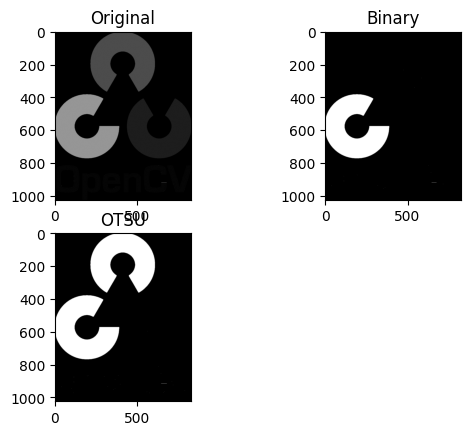

In [9]:
img = cv.imread('../opencv_logo.png',0)
# global thresholding
ret1,img1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,img2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.subplot(2,2,1),plt.imshow(img,'gray',vmin=0,vmax=255)
plt.title('Original')

plt.subplot(2,2,2),plt.imshow(img1,'gray')
plt.title('Binary')

plt.subplot(2,2,3),plt.imshow(img2,'gray')
plt.title('OTSU')